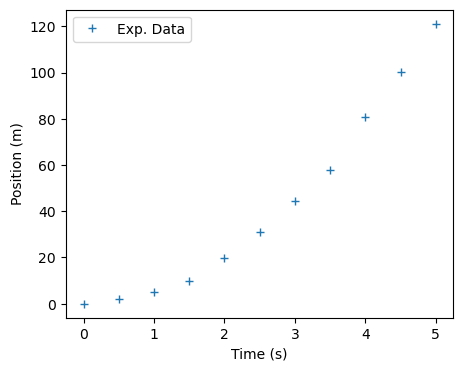

In [8]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt
# Get data into data frame
df_1 = pd.read_csv("/home/jdiego/Downloads/data_freefall.csv", sep = ",")

# Read in the columns
time = df_1["Time (s)"]
position = df_1["Position (m)"]

# Inspect data
#print(df_1)

# Create a figure environment

fig = plt.figure(figsize = (5,4))

plt.plot(time, position, linestyle = " ", marker = "+", label = "Exp. Data")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.legend()

plt.show()

In [5]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(time, position)

# 2. Pearson coefficient
pe = st.pearsonr(time, position)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SignificanceResult(statistic=1.0, pvalue=0.0)
Pearson:
 PearsonRResult(statistic=0.9626893939403707, pvalue=2.076326993227384e-06)


In [141]:
#Defining the function that fits the data

def fiting (values,a):
    
    y = a*(values)**2
    return y

In [142]:
coef, cova = opt.curve_fit(fiting, time, position)

# Double check
#print(cova) # Covariance matrix
print(coef) # The fitting parameters m and b (optimal) # We got numpy arrays

[4.90275925]


In [145]:
new_model = fiting(time,coef)

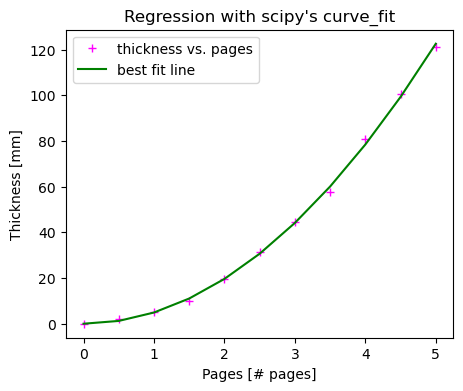

In [146]:
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(time, position, color = "magenta", marker = "+",\
        linestyle = " ", label = "thickness vs. pages")

plt.plot(time, new_model, color = "green",\
        linestyle = "-", label = "best fit line")

# Customisation
plt.xlabel("Pages [# pages]")
plt.ylabel("Thickness [mm]")
plt.legend()

plt.show()

### PROBLEM 106

In [47]:
#Reading the data 
df_2 = pd.read_csv("/home/jdiego/Downloads/data_pendulum.csv", sep = ",")

#Getting the keys of the file with keys() function
keys = df_2.keys()

#Checking the keys of the file
print(keys)

Index(['Length(m)', 'Period1(s)', 'Period2(s)', 'Period3(s)', 'Period4(s)',
       'Period5(s)'],
      dtype='object')


In [149]:
#Converting the data into arrays
length = np.array(df_2[keys[0]])

#print(length)

#Creating an empty arrange to recive the values: 

mean_p = []
std_p = []

for i in range (len(df_2['Period1(s)'])):
    #print(i)
    mean_p.append(np.mean(np.array(df_2.iloc[i][1:])))
    std_p.append((np.std(np.array(df_2.iloc[i][1:]))))
    
mean_p = np.array(mean_p)
std_p = np.array(std_p)


#print(mean_p)
#print(std_p)

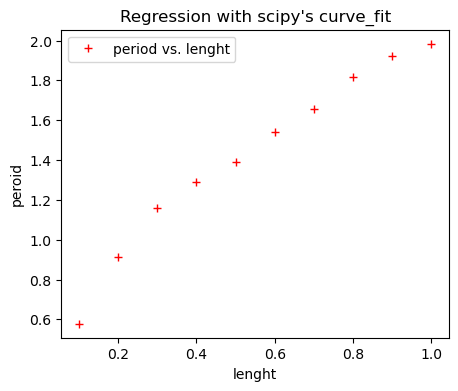

In [150]:
#PLotting the data: 
plt.figure(figsize = (5,4))

plt.title("Regression with scipy's curve_fit")

plt.plot(length, mean_p, color = "r", marker = "+",\
        linestyle = " ", label = "period vs. lenght")


# Customisation
plt.xlabel("lenght")
plt.ylabel("peroid")
plt.legend()

plt.show()

In [151]:
#defing the function to fit the model: 

def pendulum (length,beta):
    '''
    Function that calcualtes the peroid of the pendulum
    INPUT: Recieves a vector array (length) and the gravity const
    OUTPUT: Returns the period of the pendulum  
    '''
    T = beta*np.sqrt(length)
    
    return T

In [152]:
#Know we use fit_courve: 

coef, cova = opt.curve_fit(pendulum, length, mean_p )

In [153]:
print(coef[0])

2.006513337645759


In [154]:
g = (4*(np.pi)**2/coef**2)

In [155]:
print(g)

[9.80563301]


In [156]:
#Plotting the new model

mean_fit_new= pendulum(length,*coef)

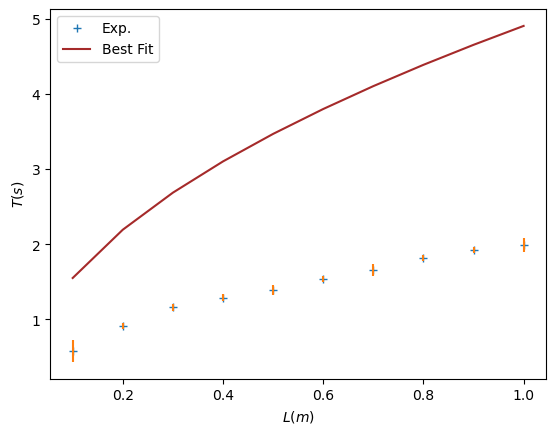

In [148]:
#Ploting: 

fig, ax = plt.subplots()

ax.plot(length, mean_p, linestyle = " ", marker = "+", label = "Exp.")
ax.plot(length, mean_fit_new, linestyle = "-", color = "brown"\
       , label = "Best Fit")
ax.errorbar(length, mean_p, yerr = 3*std_p, linestyle = " ")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend()

plt.show()